In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import sklearn as skl
import tensorflow as tf

C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\judyc\Anaconda3\envs\PythonData2\lib\site-pack

In [2]:
# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
#drop columns that do not have bearing on either target or feature variables
charity2_df = charity_df.drop(columns = ['EIN','NAME', 'APPLICATION_TYPE', 'CLASSIFICATION'])
charity2_df.head()

,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Independent,ProductDev,Association,1,0,N,5000,1
1,Independent,Preservation,Co-operative,1,1-9999,N,108590,1
2,CompanySponsored,ProductDev,Association,1,0,N,5000,0
3,CompanySponsored,Preservation,Trust,1,10000-24999,N,6692,1
4,Independent,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
charity2_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


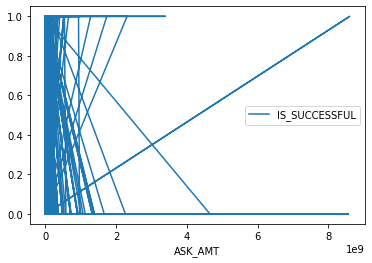

In [6]:
# Explore with a Series plot to examine outcome in relation to ask amount
lines = charity2_df.plot.line(x='ASK_AMT', y='IS_SUCCESSFUL')

In [7]:
#Print our the affiliation value counts
affiliation_counts = charity2_df.AFFILIATION.value_counts()
affiliation_counts


Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

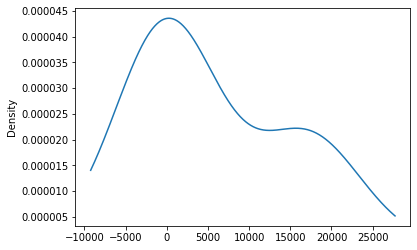

In [8]:
#Visualize the value counts for affiliation
affiliation_counts.plot.density()

In [9]:
# Determine which values to replace
replace_affiliation = list(affiliation_counts[affiliation_counts < 10000].index)

# Replace in DataFrame
for affiliation in replace_affiliation:
    charity2_df.AFFILIATION = charity2_df.AFFILIATION.replace(affiliation,"Other")


# Check to make sure binning was successful
charity2_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [10]:
#Generate our categorical variable list
charity_cat = charity2_df.dtypes[charity2_df.dtypes == "object"].index.tolist()
charity_cat

['AFFILIATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Check the number of unique values in each column
charity2_df[charity_cat].nunique()

AFFILIATION               3
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity2_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
charity2_df = charity2_df.merge(encode_df,left_index=True, right_index=True)
charity2_df = charity2_df.drop(charity_cat,1)
charity2_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = charity2_df["IS_SUCCESSFUL"].values
X = charity2_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
charity2_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Independent         float64
AFFILIATION_Other               float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64
INCOME_AMT_0                    float64
INCOME_AMT_1-9999               float64
INCOME_AMT_10000-24999          float64
INCOME_AMT_100000-499999        float64
INCOME_AMT_10M-50M              float64
INCOME_AMT_1M-5M                float64
INCOME_AMT_25000-99999          float64
INCOME_AMT_50M+                 float64
INCOME_AMT_5M-10M               float64
SPECIAL_CONSIDERATIONS_N        float64


## Attempt 1-- AFTER REMOVING POTENTIALLY "NOISY" VARIABLES; FEW HIDDEN NODES

In [17]:
# Define the model- deep neural net-attempt 1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 2

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 1s 36us/sample - loss: 566.7824 - acc: 0.4780
Epoch 2/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6918 - acc: 0.5321
Epoch 3/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 4/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 5/100
25724/25724 [==============================] - 1s 37us/sample - loss: 0.6911 - acc: 0.5321
Epoch 6/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 7/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 8/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 9/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6911 - acc: 0.5321
Epoch 10/100
25724/25724 [==============================] - 1s 35us/sam

25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6911 - acc: 0.5321
Epoch 88/100
25724/25724 [==============================] - 1s 28us/sample - 

In [20]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6909 - acc: 0.5332
Loss: 0.6909494917524799, Accuracy: 0.5331778526306152


## Attempt 2- add 2 neurons at BOTH layer 1 AND 2

In [21]:
# Define the model- deep neural net-attempt 2
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 4

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 156       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 1s 32us/sample - loss: 5134.5281 - acc: 0.4977
Epoch 2/100
25724/25724 [==============================] - 1s 28us/sample - loss: 762.0947 - acc: 0.5084
Epoch 3/100
25724/25724 [==============================] - 1s 28us/sample - loss: 824.2081 - acc: 0.5108
Epoch 4/100
25724/25724 [==============================] - 1s 28us/sample - loss: 3276.5585 - acc: 0.4987
Epoch 5/100
25724/25724 [==============================] - 1s 28us/sample - loss: 1583.5266 - acc: 0.5063
Epoch 6/100
25724/25724 [==============================] - 1s 28us/sample - loss: 853.5687 - acc: 0.5238
Epoch 7/100
25724/25724 [==============================] - 1s 28us/sample - loss: 1261.1369 - acc: 0.5092
Epoch 8/100
25724/25724 [==============================] - 1s 34us/sample - loss: 232.5633 - acc: 0.5242
Epoch 9/100
25724/25724 [==============================] - 1s 31us/sample - loss: 356.9151 - acc: 0.5108
Epoch 10/100
25724/25724 [=========================

25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 88/100
25724/25724 [==============================] - 1s 27us/sample - 

In [24]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6910 - acc: 0.5332
Loss: 0.6909636192349581, Accuracy: 0.5331778526306152


## Attempt 3- add 200 MORE EPOCHS

In [25]:
# Define the model- deep neural net-attempt 3
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 4

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 156       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [27]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =300)

Epoch 1/300
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6916 - acc: 0.5316
Epoch 2/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6911 - acc: 0.5321
Epoch 3/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6911 - acc: 0.5321
Epoch 4/300
25724/25724 [==============================] - 1s 37us/sample - loss: 0.6911 - acc: 0.5321
Epoch 5/300
25724/25724 [==============================] - 1s 47us/sample - loss: 0.6911 - acc: 0.5321
Epoch 6/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 7/300
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6911 - acc: 0.5321
Epoch 8/300
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6911 - acc: 0.5321
Epoch 9/300
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6911 - acc: 0.5321
Epoch 10/300
25724/25724 [==============================] - 1s 40us/sampl

25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/300
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/300
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/300
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/300
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/300
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/300
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/300
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/300
25724/25724 [==============================] - 1s 28us/sample - loss: 0.6911 - acc: 0.5321
Epoch 88/300
25724/25724 [==============================] - 1s 27us/sample - 

25724/25724 [==============================] - 2s 91us/sample - loss: 0.6911 - acc: 0.5321
Epoch 158/300
25724/25724 [==============================] - 2s 71us/sample - loss: 0.6911 - acc: 0.5321
Epoch 159/300
25724/25724 [==============================] - 2s 67us/sample - loss: 0.6911 - acc: 0.5321
Epoch 160/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6911 - acc: 0.5321
Epoch 161/300
25724/25724 [==============================] - 1s 44us/sample - loss: 0.6911 - acc: 0.5321
Epoch 162/300
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6911 - acc: 0.5321
Epoch 163/300
25724/25724 [==============================] - 1s 52us/sample - loss: 0.6911 - acc: 0.5321
Epoch 164/300
25724/25724 [==============================] - 1s 36us/sample - loss: 0.6911 - acc: 0.5321
Epoch 165/300
25724/25724 [==============================] - 1s 50us/sample - loss: 0.6911 - acc: 0.5321
Epoch 166/300
25724/25724 [==============================] - 1s 40us/

25724/25724 [==============================] - 2s 61us/sample - loss: 0.6911 - acc: 0.5321
Epoch 236/300
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 237/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 238/300
25724/25724 [==============================] - 1s 30us/sample - loss: 0.6911 - acc: 0.5321
Epoch 239/300
25724/25724 [==============================] - 1s 29us/sample - loss: 0.6911 - acc: 0.5321
Epoch 240/300
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6911 - acc: 0.5321
Epoch 241/300
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 242/300
25724/25724 [==============================] - 1s 38us/sample - loss: 0.6911 - acc: 0.5321
Epoch 243/300
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6911 - acc: 0.5321
Epoch 244/300
25724/25724 [==============================] - 1s 36us/

In [28]:
# Evaluate the model using the test data-2
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6909 - acc: 0.5332
Loss: 0.6909442197129608, Accuracy: 0.5331778526306152


## Attempt 4- change to another hidden layer and put 3 neurons on it-STAY AT 100 EPOCHS

In [29]:
# Define the model- deep neural net-attempt 3
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 4
hidden_nodes_layer3 = 3 

nn=tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# third hidden layer
nn.add(tf.keras.layers.Dense (units=hidden_nodes_layer3, activation = "relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 156       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 203
Trainable params: 203
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs =100)

Epoch 1/100
25724/25724 [==============================] - 1s 38us/sample - loss: 152031.3990 - acc: 0.4679
Epoch 2/100
25724/25724 [==============================] - 1s 35us/sample - loss: 39951.1945 - acc: 0.4679
Epoch 3/100
25724/25724 [==============================] - 1s 45us/sample - loss: 1.2590 - acc: 0.5322
Epoch 4/100
25724/25724 [==============================] - 2s 72us/sample - loss: 0.7681 - acc: 0.5321
Epoch 5/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.7139 - acc: 0.5321
Epoch 6/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6952 - acc: 0.5321
Epoch 7/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6915 - acc: 0.5321
Epoch 8/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.6911 - acc: 0.5321
Epoch 9/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.6911 - acc: 0.5321
Epoch 10/100
25724/25724 [==============================] - 1s 4

25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 80/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.6911 - acc: 0.5321
Epoch 81/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6911 - acc: 0.5321
Epoch 82/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.6911 - acc: 0.5321
Epoch 83/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 84/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 85/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 86/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 87/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.6911 - acc: 0.5321
Epoch 88/100
25724/25724 [==============================] - 1s 31us/sample - 

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6909 - acc: 0.5332
Loss: 0.6909470921285646, Accuracy: 0.5331778526306152
